# LAS Tile Index Fixes
Ideally, county LAS files collected under the same contract and in the same time period would be consistent in terms of format, metadata
and other attributes. Unfortunately, this is not the case. Most notible is the lack of projection information within the individual LAS files.

In [71]:
%matplotlib inline
import geopandas as gpd

In [72]:
def fix_projection(df, proj, to_proj='+init=epsg:4326'):
    """Reprojects native geometry to new projection and stores native projection in srs column
    """  
    df.loc[:, 'srs'] = proj
    if proj[0] == '+':
        df.crs = proj
    elif proj.lower().startswith('epsg'):
        df.crs = '+init=' + proj
    else:
        raise RuntimeError(f'bad proj4 projection string given, proj={proj}')
    return df.to_crs(to_proj)

{'init': 'epsg:4326'}


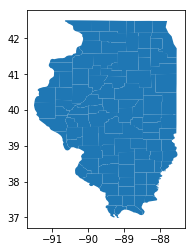

In [73]:
IL = gpd.read_file('../examples/IL_Counties.gpkg')
print(IL.crs)
base = IL.plot()
#IL[IL['NAME']=='Jefferson'].plot(ax=base, facecolor='none', edgecolor='red')

### Adams County

[-91.51484686  39.74855494 -90.9029344   40.20482267]


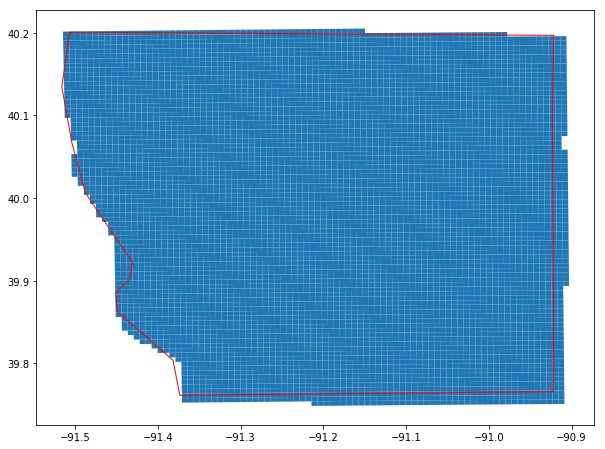

In [74]:
df = gpd.read_file('../lidar/adams/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:3444')
df.to_file('../fix/adams.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Adams'].plot(ax=tiles, facecolor='none', edgecolor='red')


### Alexander County

[-89.52684471  36.96496268 -89.12615976  37.35157481]


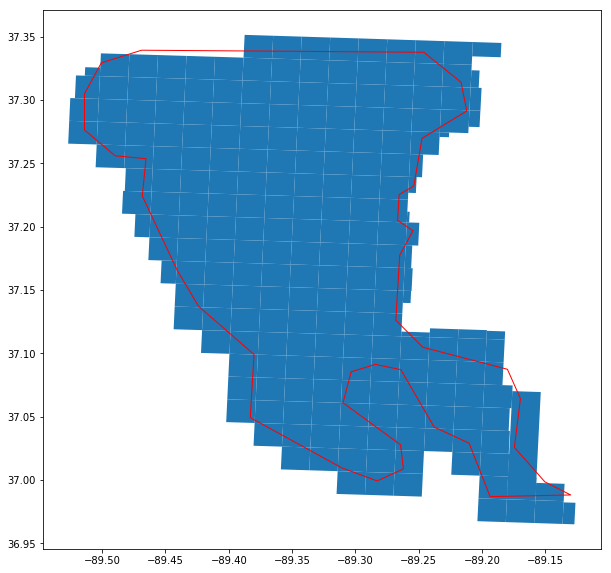

In [75]:
df = gpd.read_file('../lidar/alexander/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
df.to_file('../fix/alexander.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Alexander'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Boone County

[-88.9460974   42.14769229 -88.69932765  42.49995826]


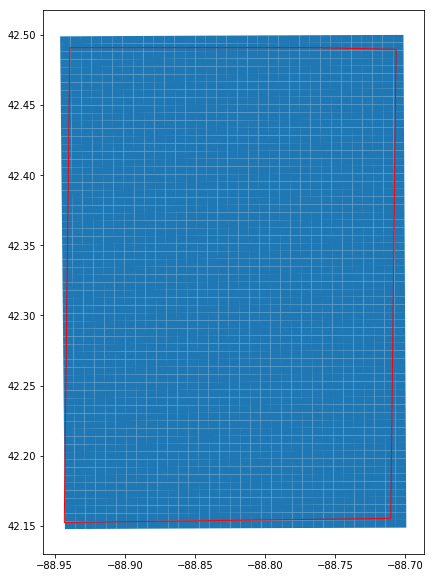

In [76]:
df = gpd.read_file('../lidar/boone/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:3443')
df.to_file('../fix/boone.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Boone'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Calhoun

[-90.93702946  38.86746598 -90.43704362  39.40674185]


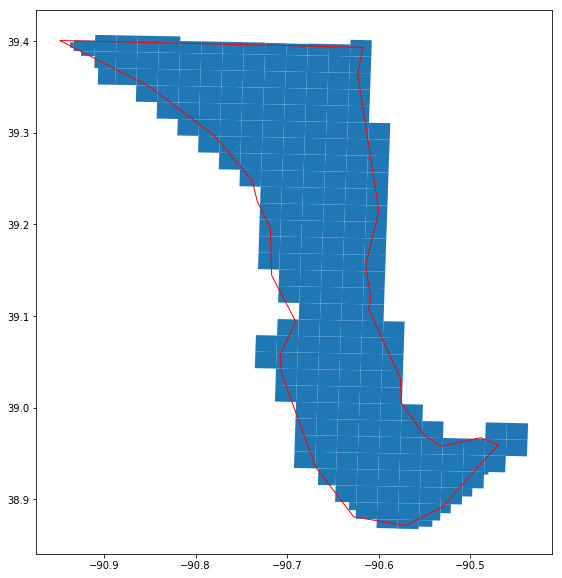

In [89]:
df = gpd.read_file('../lidar/calhoun/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
df.to_file('../fix/calhoun.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Calhoun'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Jefferson

[-89.16207966  38.11723854 -88.69000434  38.48197664]


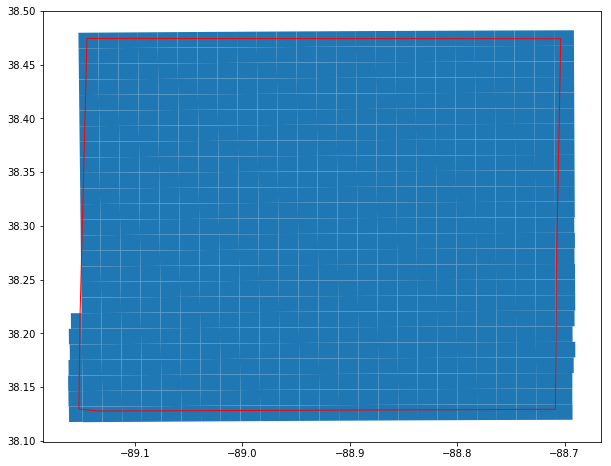

In [78]:
df = gpd.read_file('../lidar/jefferson/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:3443')
df.to_file('../fix/jefferson.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Jefferson'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Jersey

[-90.61797985  38.90719595 -90.14462017  39.2631025 ]


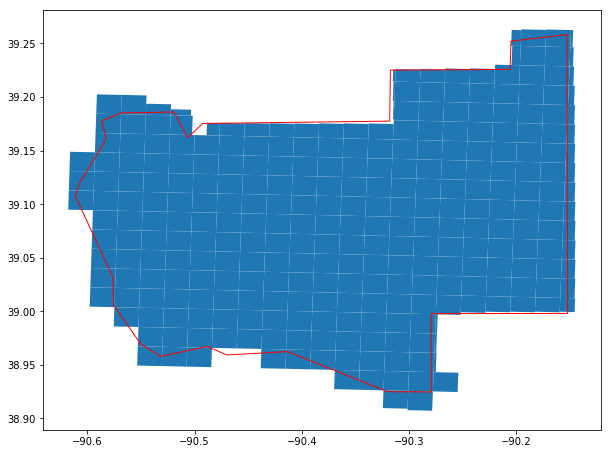

In [79]:
df = gpd.read_file('../lidar/jersey/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
df.to_file('../fix/jersey.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Jersey'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Union

[-89.53611266  37.31627707 -89.04077367  37.60620105]


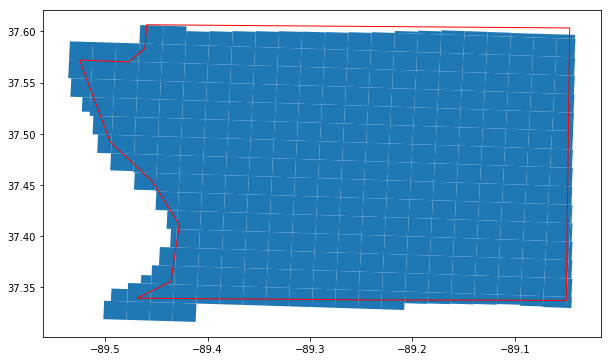

In [80]:
df = gpd.read_file('../lidar/union/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
df.to_file('../fix/union.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Union'].plot(ax=tiles, facecolor='none', edgecolor='red')

### Winnebago

[-89.4074945   42.1456522  -88.93022093  42.5064465 ]


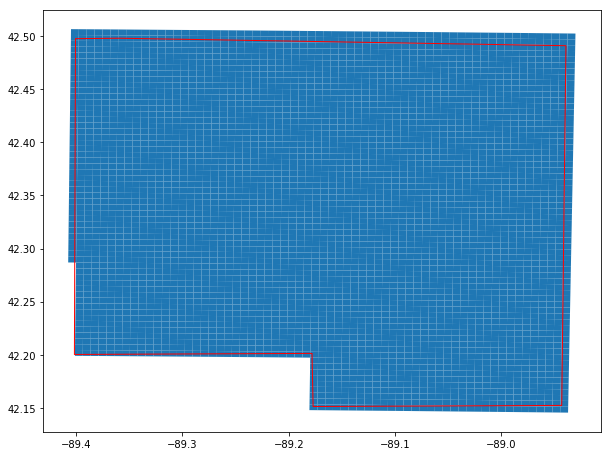

In [81]:
df = gpd.read_file('../lidar/winnebago/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
df.to_file('../fix/winnebago.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(10,10))
IL[IL['NAME']=='Winnebago'].plot(ax=tiles, facecolor='none', edgecolor='red')

# Cumberland
Cumberland's LAS files contained a different kind of error. The projection information in two of the LAS files
was incorrect (epsg:3444 instead of epsg:3443 as the rest of the tiles used). Because of this the tile index
incorrectly positioned the tile outside of Cumberland county.

[-88.48281025  39.1601426  -87.99526794  39.38529627]


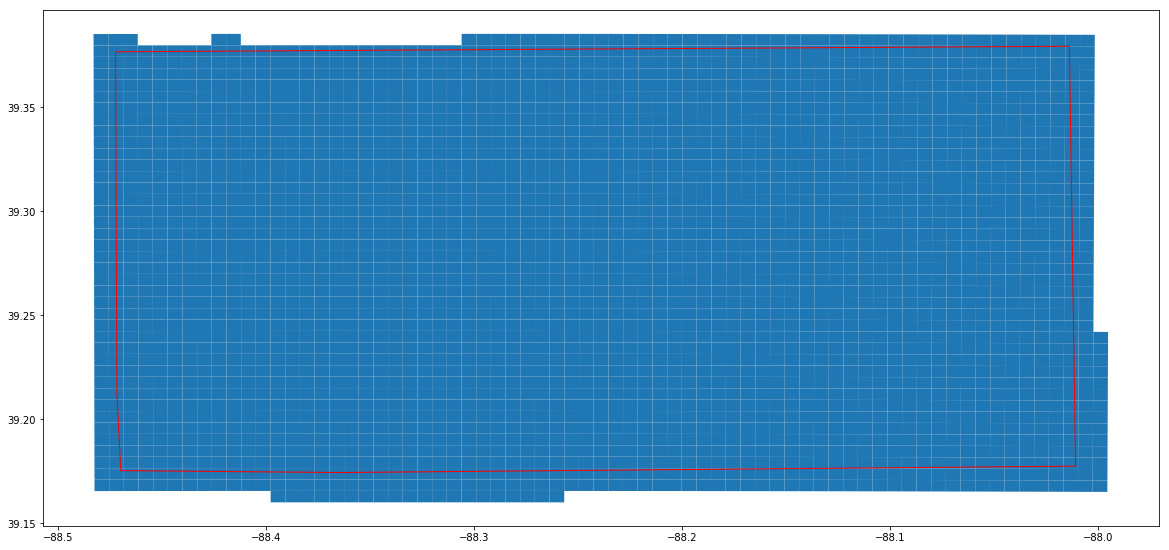

In [82]:
df = gpd.read_file('../lidar/cumberland/tiles.gpkg')
df[df['srs']=='EPSG:4326'] = fix_projection(df[df['srs']=='EPSG:4326'], 'EPSG:26915')
#df.to_file('../fix/winnebago.gpkg', driver='GPKG')
print(df.total_bounds)
tiles = df.plot(figsize=(20,20))
IL[IL['NAME']=='Cumberland'].plot(ax=tiles, facecolor='none', edgecolor='red')

In [83]:
df.total_bounds

array([-88.48281025,  39.1601426 , -87.99526794,  39.38529627])

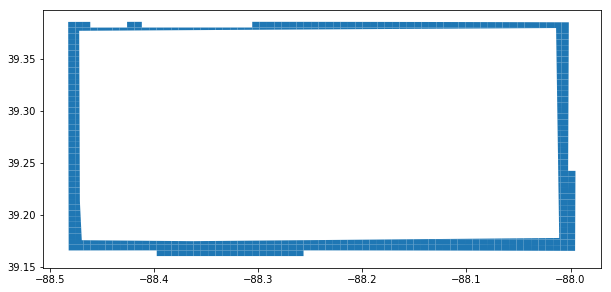

In [87]:
c = IL[IL['NAME']=='Cumberland']
x = gpd.overlay(df, c, how='difference')
x.plot(figsize=(10,10))

In [85]:
x[x.bounds['minx']<=89]

,location,srs,modified,created,geometry


In [86]:
srs = df[df['srs']=='EPSG:3444']
len(srs)

0